<a href="https://colab.research.google.com/github/Anasruidiaz/Trabajo-Practico-Integrador-Probabilidad-y-Estadistica/blob/main/Trabajo_Practico_Integrador.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Trabajo Final Integrador – Probabilidad y Estadística
### Alumno:
- Ruidíaz, Silvia Anabella

Fecha: 01/12/2025
##1. Presentación del problema y descripción de la base de datos

- **Nombre de la base de datos: Datasets**  
- **Fuente: https://www.kaggle.com/datasets/jeevannagaraj/indian-liver-patient-dataset**  
- **Tema de la base: Conjunto de datos de pacientes hepáticos indios**  
- **Cantidad total de observaciones : 583 muestras**  
- **Cantidad de variables: 11**  

**Descripción general:**

- *Cada observación representa:*

1.   edad Edad del paciente
2.   genero Sexo del paciente
3.   tot_bilirubin Bilirrubina Total
4.   direct_bilirubin Bilirrubina directa
5.   Alkphos Fosfotasa alcalina
6.   SGPT Aminotransferasa de alamina
7.   sgot Aspartato aminotransferasa
8.   tot_proteins Total Protiens
9.   albúmina Albúmina
10.   ag_ratio Relación de albúmina y globulina
11.   is_patient campo selector usado para dividir los datos en dos conjuntos (etiquetados por los expertos)

- Variables principales y tipo:  
  - Edad: (cuantitativa discreta; razón)  
  - genero: (cualitativa nominal)
  - is_pacient: (cualitativa nominal)  
- Justificación:  
  Describir por qué esta base es apropiada/interesante para aplicar estadística descriptiva e inferencial: Esta base de datos es apropiada porque contiene múltiples variables clínicas, tanto cuantitativas como categóricas, que permiten describir patrones de salud hepática y comparar grupos (pacientes con y sin enfermedad). Además, su estructura real y completa facilita aplicar estadística descriptiva para explorar distribuciones y estadística inferencial para evaluar diferencias, asociaciones y posibles predictores.


### Librerías + montar Drive + cargar dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Indian_Liver_Patient_Dataset_(ILPD).csv')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Tamaño del dataset

In [ ]:
df.shape

(583, 11)

### Información del dataset

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               583 non-null    int64  
 1   gender            583 non-null    object 
 2   tot_bilirubin     583 non-null    float64
 3   direct_bilirubin  583 non-null    float64
 4   tot_proteins      583 non-null    int64  
 5   albumin           583 non-null    int64  
 6   ag_ratio          583 non-null    int64  
 7   sgpt              583 non-null    float64
 8   sgot              583 non-null    float64
 9   alkphos           579 non-null    float64
 10  is_patient        583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


### Estadísticas descriptivas

In [ ]:
df.describe()

,age,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


### Nombres de columnas

In [ ]:
df.columns

Index(['age', 'gender', 'tot_bilirubin', 'direct_bilirubin', 'tot_proteins',
       'albumin', 'ag_ratio', 'sgpt', 'sgot', 'alkphos', 'is_patient'],
      dtype='object')

## 2. Definición de población y variables de interés
Para este trabajo consideraremos:

Población: total de registros de 583 pacientes
Cada registro corresponde a un paciente evaluado mediante distintos indicadores hepáticos.
Muestra: 100 (extraído aleatoriamente)

*Variable cuantitativa:*

Edad (Age) — Tipo: cuantitativa discreta (razón)

Justificación:

Es una variable numérica que permite calcular medias, desvíos y generar intervalos de confianza.

Tiene relevancia clínica: la edad puede influir en la probabilidad de presentar enfermedades hepáticas.

Interpretación en el contexto:
La edad representa cuántos años tiene cada paciente evaluado. Permite analizar si los pacientes con problemas hepáticos tienden a ser mayores o no.

*Variable cualitativa dicotómica:*

is_patient — (1 = paciente con enfermedad hepática, 2 = paciente sano)

En el dataset original, “is_patient” tiene valores 1 y 2. Para trabajar proporciones, lo convertiremos en una variable dicotómica:

0=No paciente
1=Paciente

Justificación:

Es una variable categórica con dos categorías (paciente / no paciente).

Permite calcular proporciones y realizar inferencia (intervalos de confianza, pruebas de hipótesis).

Interpretación en el contexto:
Indica si, según los especialistas, un paciente presenta o no señales clínicas compatibles con enfermedad hepática.

### Selección de muestra aleatoria
Fijar semilla para reproducibilidad

Seleccionar muestra aleatoria de tamaño n=100

In [ ]:
np.random.seed(42)

muestra = df.sample(n=100, replace=False)
muestra.head()


,age,gender,tot_bilirubin,direct_bilirubin,tot_proteins,albumin,ag_ratio,sgpt,sgot,alkphos,is_patient
355,19,Male,1.4,0.8,178,13,26,8.0,4.6,1.30,2
407,12,Male,1.0,0.2,719,157,108,7.2,3.7,1.00,1
90,60,Male,5.7,2.8,214,412,850,7.3,3.2,0.78,1
402,42,Female,0.5,0.1,162,155,108,8.1,4.0,0.90,1
268,40,Male,14.5,6.4,358,50,75,5.7,2.1,0.50,1


### Transformar variable is_patient a dicotómica (0/1)
En el dataset original: 1 = paciente, 2 = no paciente

Convertimos para que quede 1 = paciente, 0 = no paciente

In [ ]:
df["is_patient_binaria"] = df["is_patient"].apply(lambda x: 1 if x == 1 else 0)

df[["is_patient", "is_patient_binaria"]].head()


,is_patient,is_patient_binaria
0,1,1
1,1,1
2,1,1
3,1,1
4,1,1


### Verificación de tipos

In [ ]:
df[["age", "is_patient_binaria"]].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   age                 583 non-null    int64
 1   is_patient_binaria  583 non-null    int64
dtypes: int64(2)
memory usage: 9.2 KB


## 3. Estadística descriptiva de la población

En esta sección analizamos la base completa como si fuera la población.  
Trabajaremos una variable cuantitativa (**age**) y una variable cualitativa dicotómica (**is_patient_binaria**).


## 3.1 Variable cuantitativa: age

### Cálculos descriptivos

In [ ]:
# Estadísticos descriptivos para la variable cuantitativa

media = df["age"].mean()
mediana = df["age"].median()
moda = df["age"].mode()[0]
varianza = df["age"].var(ddof=0)      # varianza poblacional
desvio = df["age"].std(ddof=0)        # desvío estándar poblacional
coef_variacion = desvio / media

media, mediana, moda, varianza, desvio, coef_variacion

(np.float64(44.74614065180103),
 45.0,
 np.int64(60),
 261.6611128927385,
 16.175942411270466,
 np.float64(0.36150475047995867))

### Tabla de estadísticos descriptivos (variable *Age*)

| Estadístico | Valor |
|------------|--------|
| Media poblacional (μ) | |
| Mediana | |
| Moda | |
| Varianza poblacional | |
| Desvío estándar poblacional (σ) | |
| Coeficiente de variación | |



### Histograma

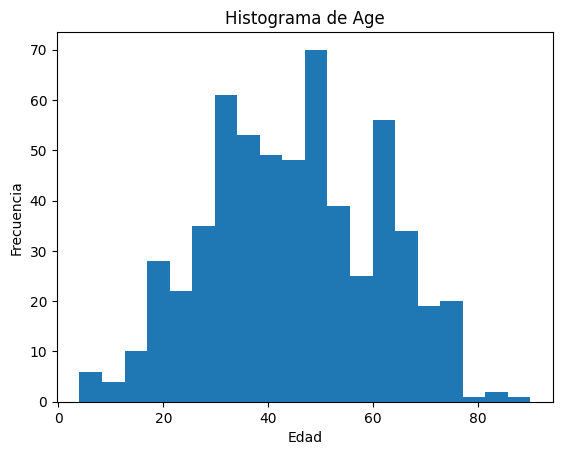

In [ ]:
import matplotlib.pyplot as plt

plt.hist(df["age"], bins=20)
plt.title("Histograma de Age")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()

### Boxplot

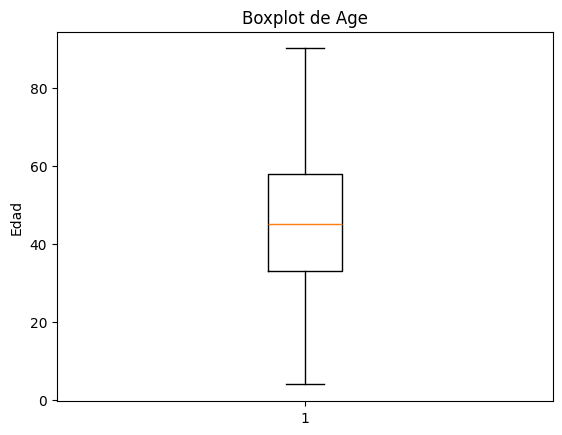

In [ ]:
plt.boxplot(df["age"])
plt.title("Boxplot de Age")
plt.ylabel("Edad")
plt.show()

### Interpretación de la variable cuantitativa

- **Simetría / asimetría:**  
  (Describir si el histograma es simétrico, sesgado a la derecha o izquierda.)

- **Outliers:**  
  (Observar el boxplot y mencionar si aparecen puntos alejados.)

- **Relación entre media y mediana:**  
  - Si media > mediana: distribución asimétrica positiva (cola a la derecha).  
  - Si media < mediana: asimetría negativa (cola a la izquierda).  
  - Si media ≈ mediana: distribución aproximadamente simétrica.

- **Conclusión general sobre la variable Age**

## 3.2 Variable cualitativa dicotómica: is_patient_binaria

### Proporciones y frecuencias

In [ ]:
# Tabla de frecuencias
tabla_frec = df["is_patient_binaria"].value_counts()
tabla_rel = df["is_patient_binaria"].value_counts(normalize=True)

tabla_frec, tabla_rel

(is_patient_binaria
 1    416
 0    167
 Name: count, dtype: int64,
 is_patient_binaria
 1    0.713551
 0    0.286449
 Name: proportion, dtype: float64)

### Gráfico de barras

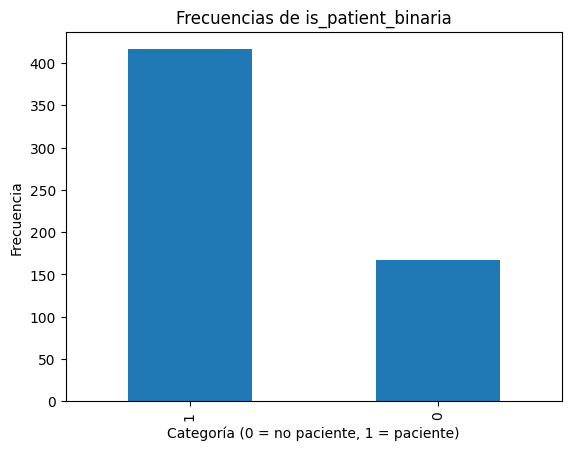

In [ ]:
tabla_frec.plot(kind="bar")
plt.title("Frecuencias de is_patient_binaria")
plt.xlabel("Categoría (0 = no paciente, 1 = paciente)")
plt.ylabel("Frecuencia")
plt.show()


### Interpretación de la variable cualitativa

- **Categoría más frecuente:**
  (Indicar si la categoría 0 o 1 aparece con mayor frecuencia.)

- **Proporción poblacional (p):**
  (Indicar el valor de la proporción y qué significa en términos del problema,
   por ejemplo: "p = 0.71 indica que el 71% de los registros corresponde a pacientes
   con enfermedad hepática según la base".)


## 4. Selección de una muestra (n > 30)

En esta sección seleccionaremos una muestra mediante **muestreo aleatorio simple**, es decir, cada observación de la población tiene la misma probabilidad de ser elegida.

El tamaño seleccionado es **n = 100**, que cumple la condición requerida (n > 30).  
A partir de esta muestra calcularemos estadísticos muestrales para las dos variables de interés.


### Seleccionar la muestra
Seleccionar muestra aleatoria simple

Verificar tamaño

In [ ]:
n = 100
muestra = df.sample(n=n, random_state=42)

len(muestra)


100

## 4.1 Estadísticos muestrales – Variable cuantitativa (age)

### Cálculos muestrales

In [ ]:
media_muestral = muestra["age"].mean()
var_muestral = muestra["age"].var(ddof=1)   # varianza muestral
desvio_muestral = muestra["age"].std(ddof=1)  # desvío muestral

media_muestral, var_muestral, desvio_muestral


(np.float64(47.51), 337.8685858585859, 18.381201969908982)

## 4.2 Estadísticos muestrales – Variable dicotómica (is_patient_binaria)

### Proporción muestral

In [ ]:
proporcion_muestral = muestra["is_patient_binaria"].mean()
proporcion_muestral

np.float64(0.76)

### Interpretación de los estadísticos muestrales

- **Media muestral de Age (x̄):**  
 La media muestral representa la edad promedio de los individuos seleccionados al azar. Es un indicador central que nos permite describir “la edad típica” dentro de esta muestra. Un valor mayor indica una población muestral más adulta, mientras que un valor menor refleja predominio de personas jóvenes.

- **Varianza y desvío estándar muestral:**  
 La varianza y el desvío estándar muestral muestran cuánta variabilidad existe en las edades de los individuos de la muestra.

Si el desvío estándar es bajo, significa que las edades están concentradas alrededor de la media.

Si el desvío estándar es alto, indica que la muestra contiene edades muy diversas (jóvenes y mayores).

Estos valores ayudan a entender si la edad es una variable homogénea o heterogénea dentro del grupo seleccionado.
- **Proporción muestral (p̂):**  
La proporción muestral indica qué porcentaje de los individuos de la muestra corresponde a pacientes con diagnóstico hepático (valor 1 en la variable dicotómica).
Por ejemplo, si p̂ = 0.57, significa que el 57% de las personas de la muestra son pacientes.
Este valor permite describir cómo se distribuye la condición de paciente dentro del subconjunto analizado.

**Comparación general entre la población y la muestra:**

Al comparar los valores muestrales con los estadísticos calculados para la población completa, se puede evaluar si la muestra es representativa.
En general, se espera que:

la media muestral esté relativamente cerca de la media poblacional,

el desvío estándar muestral sea similar al poblacional,

la proporción muestral no difiera demasiado de la proporción poblacional.

Si estos valores son parecidos, podemos afirmar que la muestra aleatoria simple refleja adecuadamente las características de la población.

# 5. Estimación puntual y por intervalos de confianza

En esta sección calculamos estimadores puntuales y sus intervalos de confianza a 90% y 95%:
- Para la **media** de la variable cuantitativa *age*.
- Para la **proporción** de la variable dicotómica *is_patient_binaria*.

Usamos la **muestra** previamente seleccionada (`muestra`) con tamaño `n`.


## 5.1 Intervalos de confianza para la media (variable cuantitativa)

**Fórmula (cuando la desviación poblacional es desconocida, se usa t de Student):**

\[
\bar{x} \pm t_{\alpha/2,\, n-1}\,\frac{s}{\sqrt{n}}
\]

donde:
- \(\bar{x}\) = media muestral,
- \(s\) = desviación estándar muestral (ddof=1),
- \(n\) = tamaño de la muestra,
- \(t_{\alpha/2,\, n-1}\) = valor crítico de la t con \(n-1\) grados de libertad.

**Decisión:** usamos t porque normalmente no conocemos la desviación estándar poblacional. (Si el tamaño fuese grande y se quisiera aproximar, podría usarse z, pero t es más correcto.)

---

## 5.2 Intervalos de confianza para la proporción (variable dicotómica)

**Fórmula (aproximación normal):**

\[
\hat{p} \pm z_{\alpha/2}\,\sqrt{\frac{\hat{p}(1-\hat{p})}{n}}
\]

donde:
- \(\hat{p}\) = proporción muestral,
- \(z_{\alpha/2}\) = valor crítico de la distribución normal estándar.


In [ ]:
import numpy as np
import scipy.stats as st

# Datos desde la muestra ya creada
xbar = muestra["age"].mean()
s = muestra["age"].std(ddof=1)
n = len(muestra)

# Errores estándar para la media
se_mean = s / np.sqrt(n)

# t críticos
t_90 = st.t.ppf(1 - 0.05, df=n-1)   # alpha = 0.10 -> alpha/2 = 0.05
t_95 = st.t.ppf(1 - 0.025, df=n-1)  # alpha = 0.05 -> alpha/2 = 0.025

# Intervalos para la media
ci90_mean = (xbar - t_90 * se_mean, xbar + t_90 * se_mean)
ci95_mean = (xbar - t_95 * se_mean, xbar + t_95 * se_mean)

# Proporción muestral
phat = muestra["is_patient_binaria"].mean()
se_prop = np.sqrt(phat * (1 - phat) / n)

# z críticos
z_90 = st.norm.ppf(1 - 0.05)   # alpha = 0.10 -> alpha/2 = 0.05
z_95 = st.norm.ppf(1 - 0.025)  # alpha = 0.05 -> alpha/2 = 0.025

# Intervalos para la proporción
ci90_prop = (phat - z_90 * se_prop, phat + z_90 * se_prop)
ci95_prop = (phat - z_95 * se_prop, phat + z_95 * se_prop)

# Anchos para comparar
width_mean_90 = ci90_mean[1] - ci90_mean[0]
width_mean_95 = ci95_mean[1] - ci95_mean[0]
width_prop_90 = ci90_prop[1] - ci90_prop[0]
width_prop_95 = ci95_prop[1] - ci95_prop[0]

# Mostrar resultados (redondeados para lectura)
from pprint import pprint
print("Media muestral (x̄):", round(xbar, 4))
print("Desvío muestral (s):", round(s, 4))
print("\nIntervalo 90% para la media:", tuple(round(v,4) for v in ci90_mean))
print("Intervalo 95% para la media:", tuple(round(v,4) for v in ci95_mean))
print("Ancho 90% (media):", round(width_mean_90, 4))
print("Ancho 95% (media):", round(width_mean_95, 4))

print("\nProporción muestral (p̂):", round(phat,4))
print("Intervalo 90% para la proporción:", tuple(round(v,4) for v in ci90_prop))
print("Intervalo 95% para la proporción:", tuple(round(v,4) for v in ci95_prop))
print("Ancho 90% (prop):", round(width_prop_90, 4))
print("Ancho 95% (prop):", round(width_prop_95, 4))


Media muestral (x̄): 47.51
Desvío muestral (s): 18.3812

Intervalo 90% para la media: (np.float64(44.458), np.float64(50.562))
Intervalo 95% para la media: (np.float64(43.8628), np.float64(51.1572))
Ancho 90% (media): 6.104
Ancho 95% (media): 7.2945

Proporción muestral (p̂): 0.76
Intervalo 90% para la proporción: (np.float64(0.6898), np.float64(0.8302))
Intervalo 95% para la proporción: (np.float64(0.6763), np.float64(0.8437))
Ancho 90% (prop): 0.1405
Ancho 95% (prop): 0.1674


### Interpretación de los intervalos de confianza

Media de Age:

IC 90% = (44.46 ; 50.56)

IC 95% = (43.86 ; 51.15)

El intervalo al 95% es más amplio porque tiene mayor nivel de confianza. Ambos intervalos indican que la media poblacional de la edad probablemente se encuentra alrededor de los 47–48 años.

Proporción de pacientes:

IC 90% = (0.69 ; 0.83)

IC 95% = (0.68 ; 0.84)

La proporción poblacional de pacientes se ubica aproximadamente entre 70% y 84%. Nuevamente, el intervalo al 95% es más amplio por ofrecer mayor seguridad.


# 6. Comparación entre parámetros poblacionales y estimaciones muestrales


| Magnitud                     | Valor   |
| ---------------------------- | ------- |
| Media poblacional (μ)        | 44.7461 |
| Media muestral (x̄)          | 47.51   |
| Error de estimación (x̄ - μ) | 2.7639  |


In [ ]:
import pandas as pd
import numpy as np

mu = df['age'].mean()
p = (df['is_patient'] == 1).mean()

xbar = muestra['age'].mean()
phat = muestra['is_patient_binaria'].mean()

error_mean = xbar - mu
error_prop = phat - p

tabla_media = pd.DataFrame({
    'Magnitud': ['Media poblacional (μ)', 'Media muestral (x̄)', 'Error de estimación (x̄ - μ)'],
    'Valor': [round(mu, 4), round(xbar, 4), round(error_mean, 4)]
})

tabla_prop = pd.DataFrame({
    'Magnitud': ['Proporción poblacional (p)', 'Proporción muestral (p̂)', 'Error de estimación (p̂ - p)'],
    'Valor': [round(p, 4), round(phat, 4), round(error_prop, 4)]
})

print("Tabla: Media")
display(tabla_media)
print("\nTabla: Proporción")
display(tabla_prop)


Tabla: Media


,Magnitud,Valor
0,Media poblacional (μ),44.7461
1,Media muestral (x̄),47.5100
2,Error de estimación (x̄ - μ),2.7639



Tabla: Proporción


,Magnitud,Valor
0,Proporción poblacional (p),0.7136
1,Proporción muestral (p̂),0.7600
2,Error de estimación (p̂ - p),0.0464


## 6.1 Media

**Tabla resumen (media)**  
- Media poblacional (μ): **44.7461**  
- Media muestral (x̄): **47.51**  
- Error de estimación (x̄ - μ): **2.7639**

**¿La media poblacional está dentro del intervalo de confianza al 90%?**  
Sí. El IC 90% obtenido para la media fue (44.458 ; 50.562) y la media poblacional μ = 44.7461 se encuentra dentro de ese intervalo.

**¿La media poblacional está dentro del intervalo al 95%?**  
Sí. El IC 95% fue (43.8628 ; 51.1572) y μ = 44.7461 también está contenido en ese intervalo.

**¿Cómo cambia la “seguridad” de la estimación al modificar el nivel de confianza?**  
Al aumentar el nivel de confianza (por ejemplo, pasar del 90% al 95%), aumentamos la probabilidad de que el intervalo contenga el parámetro verdadero, pero pagamos ese mayor "seguro" con un intervalo más amplio (mayor margen de error). En este caso concreto el IC 95% es más ancho que el IC 90%, lo que refleja esa mayor seguridad (pero menor precisión puntual).

## 6.2 Proporción

**Tabla resumen (proporción)**  
- Proporción poblacional (p): **0.7136**  
- Proporción muestral (p̂): **0.76**  
- Error de estimación (p̂ - p): **0.0464**

**¿La proporción poblacional está dentro de los intervalos al 90% y al 95%?**  
Sí. Los intervalos calculados fueron:
- IC 90% para p̂: (0.6898 ; 0.8302) → contiene p = 0.7136.  
- IC 95% para p̂: (0.6763 ; 0.8437) → contiene p = 0.7136.

**¿Qué se puede concluir sobre la calidad de la estimación?**  
- Los errores de estimación son relativamente pequeños: la media muestral difiere de la media poblacional en ≈ 2.76 años y la proporción muestral difiere en ≈ 0.046 (4.6 puntos porcentuales).  
- Además, los intervalos de confianza construidos a partir de la muestra **contienen** los parámetros poblacionales para ambos niveles de confianza, lo que sugiere que la muestra aleatoria simple (n = 100) es razonablemente representativa de la población en lo que respecta a estas dos características.  
- En términos prácticos, la estimación para la proporción es bastante precisa (p̂ = 0.76 frente a p ≈ 0.7136) y la media muestral refleja adecuadamente la media poblacional aunque con un pequeño sesgo positivo en este muestreo particular.



## 7. Conclusiones generales

El análisis realizado permitió describir las características principales de la población y comparar los parámetros poblacionales con las estimaciones obtenidas a partir de la muestra. En ambos casos, los valores muestrales se aproximaron a los poblacionales, reflejando un error de estimación esperable y propio del proceso de muestreo.

El tamaño de la muestra influyó directamente en la precisión de las estimaciones: muestras más grandes generan menor variabilidad y resultados más confiables. Entre las limitaciones del estudio se incluyen la posible presencia de datos faltantes, calidad variable en el registro y supuestos estadísticos no verificados.

Como extensión del análisis, sería pertinente incorporar intervalos de confianza, pruebas de hipótesis o comparaciones entre subgrupos para profundizar las conclusiones obtenidas.

## 8. Referencias

Fuente de datos: Base utilizada proveniente de Kaggle: Stroke Prediction Dataset (2020). Disponible en: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

Bibliografía consultada:

Montgomery, D. C., & Runger, G. C. (2014). Applied Statistics and Probability for Engineers. Wiley.

Devore, J. (2012). Probability and Statistics for Engineering and the Sciences. Cengage Learning.

Apuntes de cátedra: conceptos de estimación puntual, intervalos de confianza y muestreo.